In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
df = load_data('IBM.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,78.800003,80.570000,78.190002,80.570000,53.418415,7864500
1,2003-01-03,80.699997,81.650002,80.209999,81.650002,54.134457,5962300
2,2003-01-06,81.900002,84.800003,81.809998,83.589996,55.420681,7921300
3,2003-01-07,83.949997,86.180000,83.750000,86.000000,57.018513,11906900
4,2003-01-08,85.550003,85.690002,84.070000,84.190002,55.818470,9508800


In [5]:
len(df)

1378

In [6]:
def show_corr(df):
    cols_to_use_corr = list(df.columns)
    cols_to_use_corr.pop(0)
    display(df[cols_to_use_corr].corr())
    pd.plotting.scatter_matrix(df[cols_to_use_corr],figsize=(15,12));

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998569,0.998503,0.996945,0.993566,0.191706
High,0.998569,1.000000,0.998341,0.998758,0.995655,0.206662
Low,0.998503,0.998341,1.000000,0.998613,0.994830,0.172362
Close,0.996945,0.998758,0.998613,1.000000,0.996513,0.188590
Adj Close,0.993566,0.995655,0.994830,0.996513,1.000000,0.197670
Volume,0.191706,0.206662,0.172362,0.188590,0.197670,1.000000


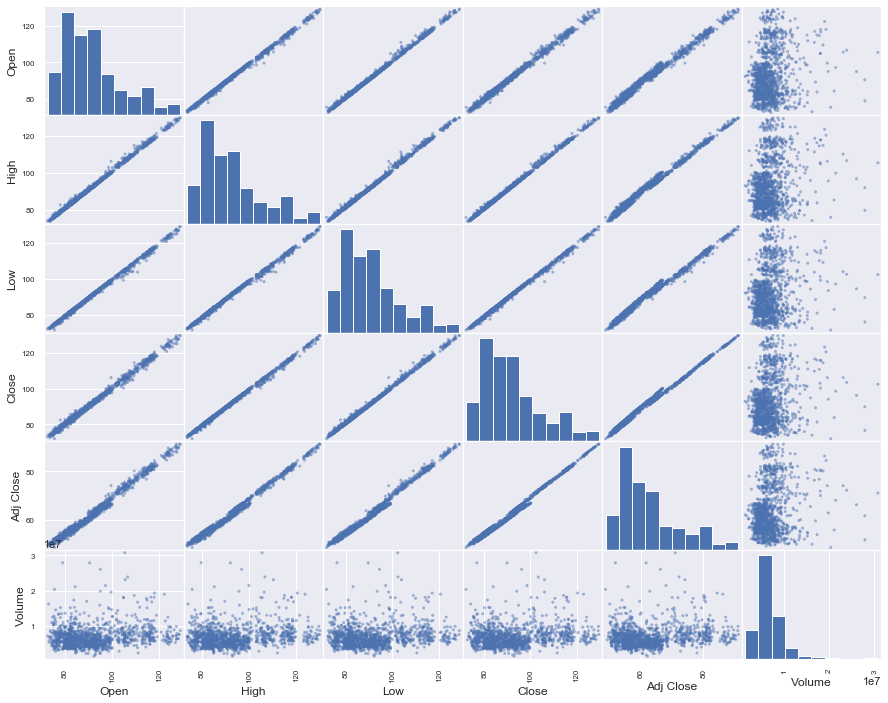

In [7]:
show_corr(df)

In [8]:
def process(df):
    df['Day'] = df['Date'].apply(lambda x: x.split('-')[-1])
    df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])
    df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
    df.rename(columns={'Open' : 'Open Price','Close' : 'Close Price'},inplace=True)
    return df

In [9]:
df = process(df)

In [10]:
df.head()

,Date,Open Price,High,Low,Close Price,Adj Close,Volume,Day,Year,Month
0,2003-01-02,78.800003,80.570000,78.190002,80.570000,53.418415,7864500,02,2003,01
1,2003-01-03,80.699997,81.650002,80.209999,81.650002,54.134457,5962300,03,2003,01
2,2003-01-06,81.900002,84.800003,81.809998,83.589996,55.420681,7921300,06,2003,01
3,2003-01-07,83.949997,86.180000,83.750000,86.000000,57.018513,11906900,07,2003,01
4,2003-01-08,85.550003,85.690002,84.070000,84.190002,55.818470,9508800,08,2003,01


In [11]:
def show_mean(df,by='Year',field='Open Price'):
    df.groupby(by)['Open Price'].mean().plot.bar()
    plt.title('Mean of a field {0} by {1}'.format(field, by.lower()));

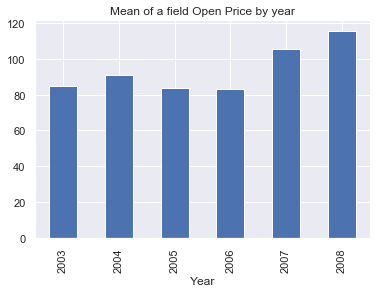

In [12]:
show_mean(df)

In [13]:
import calendar

In [14]:
def show_chart(df,col='Open Price',year='2008',month=['01','02','03'],margin=5,figsize=(15,12)):
    to_plot = df[(df['Year']==year) & (df['Month'].isin(month))]
    colors = ['r','g','b','y','gray']
    colors = colors[:len(month)]
    to_use_colors = []
    ranges = []
    counter = 0
    start_month = 0
    length_monthes = []
    for c,i in zip(colors,month):
        len_month = len(to_plot[to_plot['Month']==i])
        length_monthes.append(len_month)
        if counter!=0:
            start_month+=len_month+margin
        to_use_colors.extend([c for i in range(len_month)])
        ranges.extend(list(range(start_month,start_month+len_month)))
        counter+=1
    y = to_plot['Day'].values
    x = to_plot[col].values
    plt.figure(figsize=figsize)
    plt.title('Chart for field {0} for {1} year'.format(col,year))
    plt.bar(ranges,x,color=to_use_colors)
    month_names = [calendar.month_name[int(i[1])] if i[0]=='0' else calendar.month_name[int(i)] for i in month]
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    plt.legend(handles,month_names)
    plt.xticks(ranges,y,rotation=90)
    plt.xlabel('Days')
    plt.ylabel('Values')

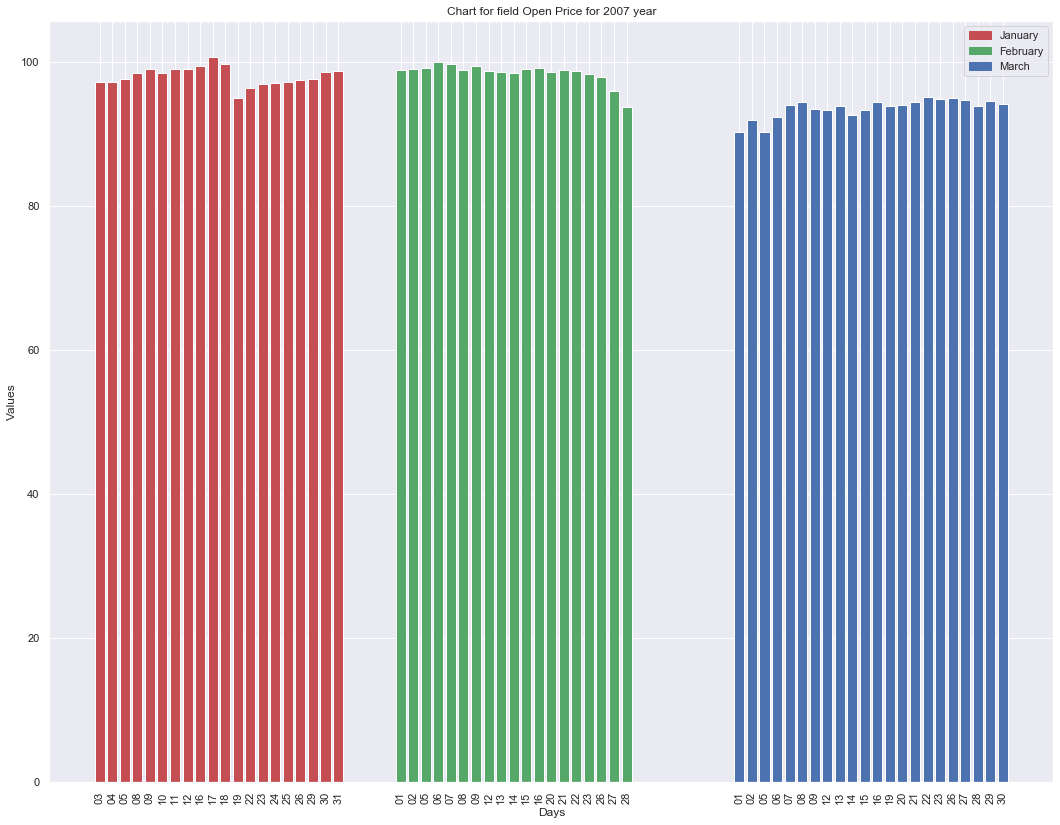

In [18]:
show_chart(df,'Open Price',year='2007',month=['01','02','03'],figsize=(18,14))